# Density: experimental data

## Create mega dataframe with all the clean density values and save as csv

In [8]:
#05/11/2025
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../")

#plotting parameters
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams.update({'font.size': 20*1.3})
plt.rcParams['figure.facecolor'] = "white"

def paper_path(paper_number):
    return f"dataframes/experimental_data_ammonia_density/0{str(paper_number)}.xlsx"

#data: paper_number: [authors, year, path]
all_papers = {
    357: ["Beattie and Lawrence", 1930, paper_path(357)],
    358: ["Date", 1973, paper_path(358)],
    359: ["Date", 1973, paper_path(359)],
    360: ["Holcomb and Outcalt", 1999, paper_path(360)],
    361: ["Ichihara and Uematsu", 1994, paper_path(361)],
    362: ["Kasahara et al.", 1999, paper_path(362)],
    363: ["Keyes", 1931, paper_path(363)],
    364: ["Kondo et al.", 2002, paper_path(364)],
    365: ["Kumagai and Toriumi", 1971, paper_path(365)],
    367: ["Lichtblau et al.", 1964, paper_path(367)],
    368: ["Muromachi et al.", 2008, paper_path(368)],
    369: ["Perman and Davies", 1906, paper_path(369)],
    370: ["Sato et al.", 2005, paper_path(370)],
    372: ["Zander and Thomas", 1979, paper_path(372)],
    373: ["Harlow et al.", 1997, paper_path(373)],
    374: ["United States Bureau of Standards", 1923, paper_path(374)],
    376: ["Vargaftik", 1975, paper_path(376)],
}

# mega_df
pressure =[]
temperature = []
density =[]

pressure_error =[]
temperature_error = []
density_error = []

paper =[]

#create mega dataframe
for key in all_papers.keys():
    path = all_papers[key][2]
    data = pd.read_excel(path)

    pressure += list(data["P_SI"])
    temperature += list(data["T_SI"])
    density += list(data["rho_SI"])

    pressure_error += list(data["delta_P"])
    temperature_error += list(data["delta_T"])
    density_error += list(data["delta_rho"])

    paper += [key]*(data.index[-1]+1)

df = pd.DataFrame(data = {"paper": paper,
                          "P": pressure,
                          "T": temperature,
                          "rho": density,
                          "delta_P": pressure_error,
                          "delta_T": temperature_error,
                          "delta_rho": density_error}
)


# save dataframe
df.to_csv("dataframes/experimental_data_ammonia_density/ammonia_density.csv", index=False)



## Scatter plot of data per paper

total number of points in graph = 3952


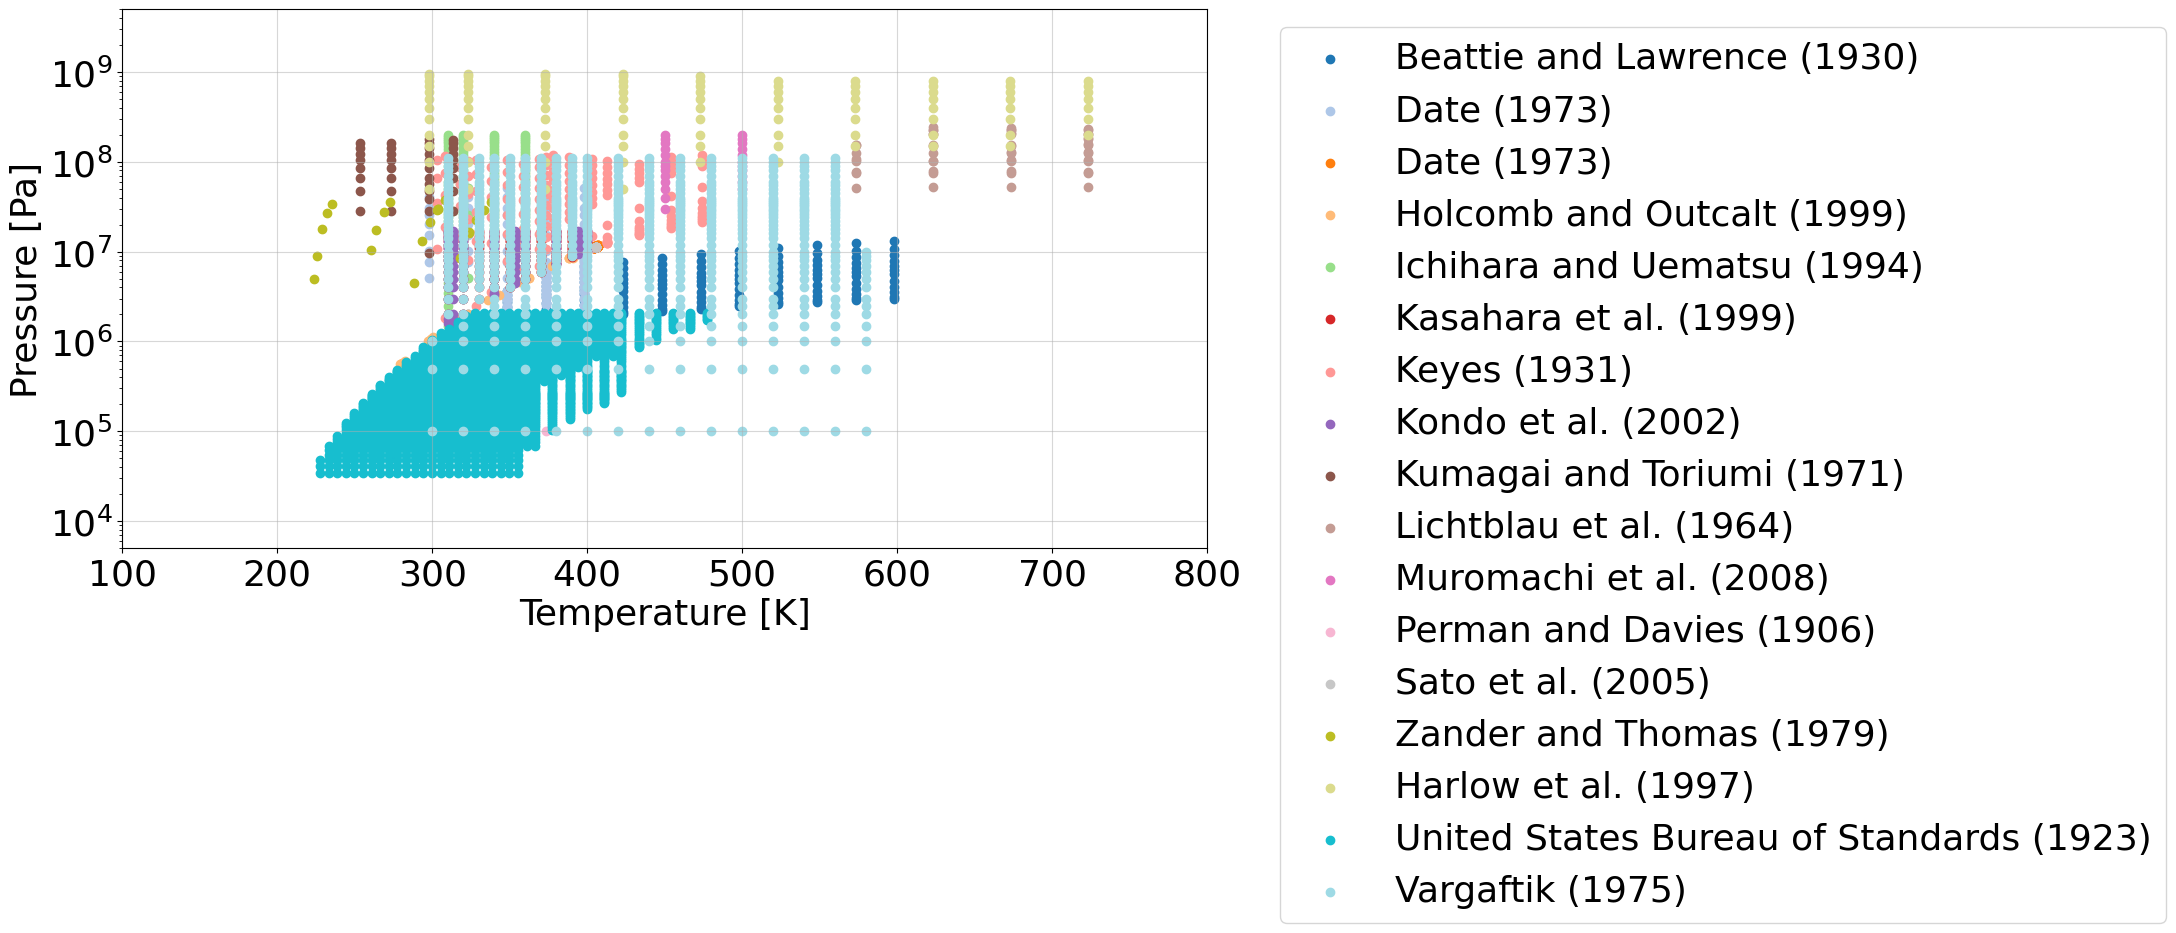

In [12]:
#05/11/2025
import pandas as pd
import matplotlib.pyplot as plt

def paper_path(paper_number):
    return f"dataframes/experimental_data_ammonia_density/0{str(paper_number)}.xlsx"

#data: paper_number: [authors, year, path]
all_papers = {
    357: ["Beattie and Lawrence", 1930, paper_path(357)],
    358: ["Date", 1973, paper_path(358)],
    359: ["Date", 1973, paper_path(359)],
    360: ["Holcomb and Outcalt", 1999, paper_path(360)],
    361: ["Ichihara and Uematsu", 1994, paper_path(361)],
    362: ["Kasahara et al.", 1999, paper_path(362)],
    363: ["Keyes", 1931, paper_path(363)],
    364: ["Kondo et al.", 2002, paper_path(364)],
    365: ["Kumagai and Toriumi", 1971, paper_path(365)],
    367: ["Lichtblau et al.", 1964, paper_path(367)],
    368: ["Muromachi et al.", 2008, paper_path(368)],
    369: ["Perman and Davies", 1906, paper_path(369)],
    370: ["Sato et al.", 2005, paper_path(370)],
    372: ["Zander and Thomas", 1979, paper_path(372)],
    373: ["Harlow et al.", 1997, paper_path(373)],
    374: ["United States Bureau of Standards", 1923, paper_path(374)],
    376: ["Vargaftik", 1975, paper_path(376)],
}

df = pd.read_csv("dataframes/experimental_data_ammonia_density/ammonia_density.csv")

fig, ax = plt.subplots()

cmap = plt.get_cmap("tab20")
number = len(all_papers)
colors = [cmap(i) for i in np.linspace(0, 1, number)]

points = 0
for i, paper in enumerate(all_papers.keys()):
    data = df[df["paper"]==paper]
    ax.scatter(data["T"], data["P"], label = all_papers[paper][0] + " " + f"({all_papers[paper][1]})", color=colors[i])
    points += len(data)

print(f"total number of points in graph = {points}")

ax.set(yscale="log", ylabel="Pressure [Pa]", xlabel="Temperature [K]", xlim=(100, 800), ylim=(5e3, 5e9))
ax.grid(alpha=0.5)
ax.legend(loc="upper left", bbox_to_anchor=(1.05,1))    


## Separate data into supercritical, superheated and subcooled regions

C:\Users\cd318\AppData\Local\Temp\ipykernel_13344\2062260380.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_supercritical = df[df["T"]>NH3.T_c][df["P"]>NH3.P_c]
C:\Users\cd318\AppData\Local\Temp\ipykernel_13344\2062260380.py:61: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_superheated = df[df["P"]<NH3.P_c][df["T"]>T_interpolated]
C:\Users\cd318\AppData\Local\Temp\ipykernel_13344\2062260380.py:83: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_subcooled = df[df["T"]<NH3.T_c][df["P"]>P_interpolated]


[338.85422626 341.09978308 346.17620642 ... 405.6        405.6
 405.6       ]


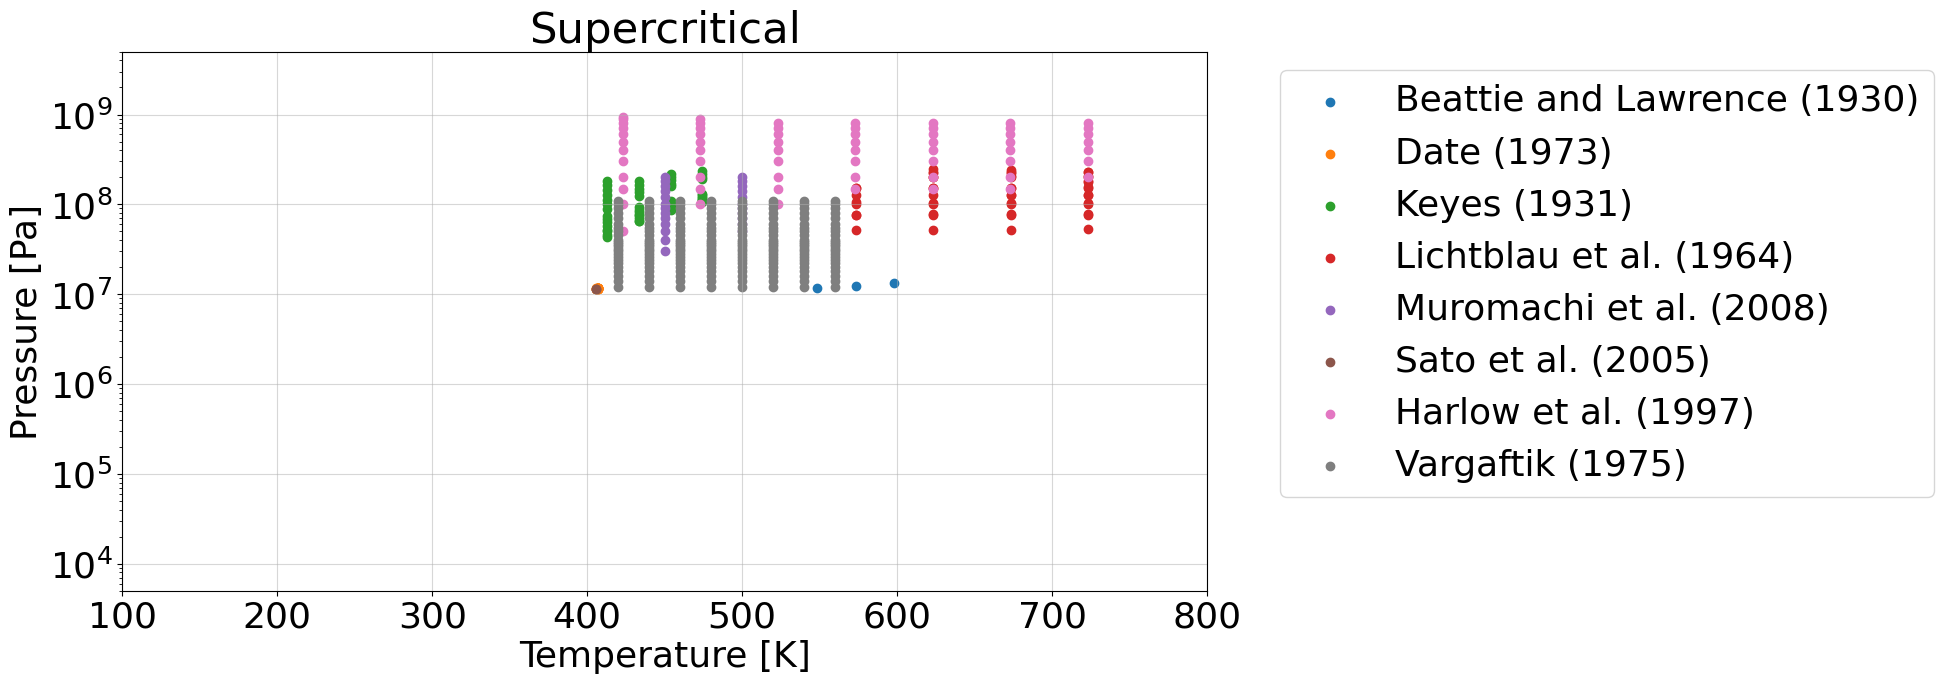

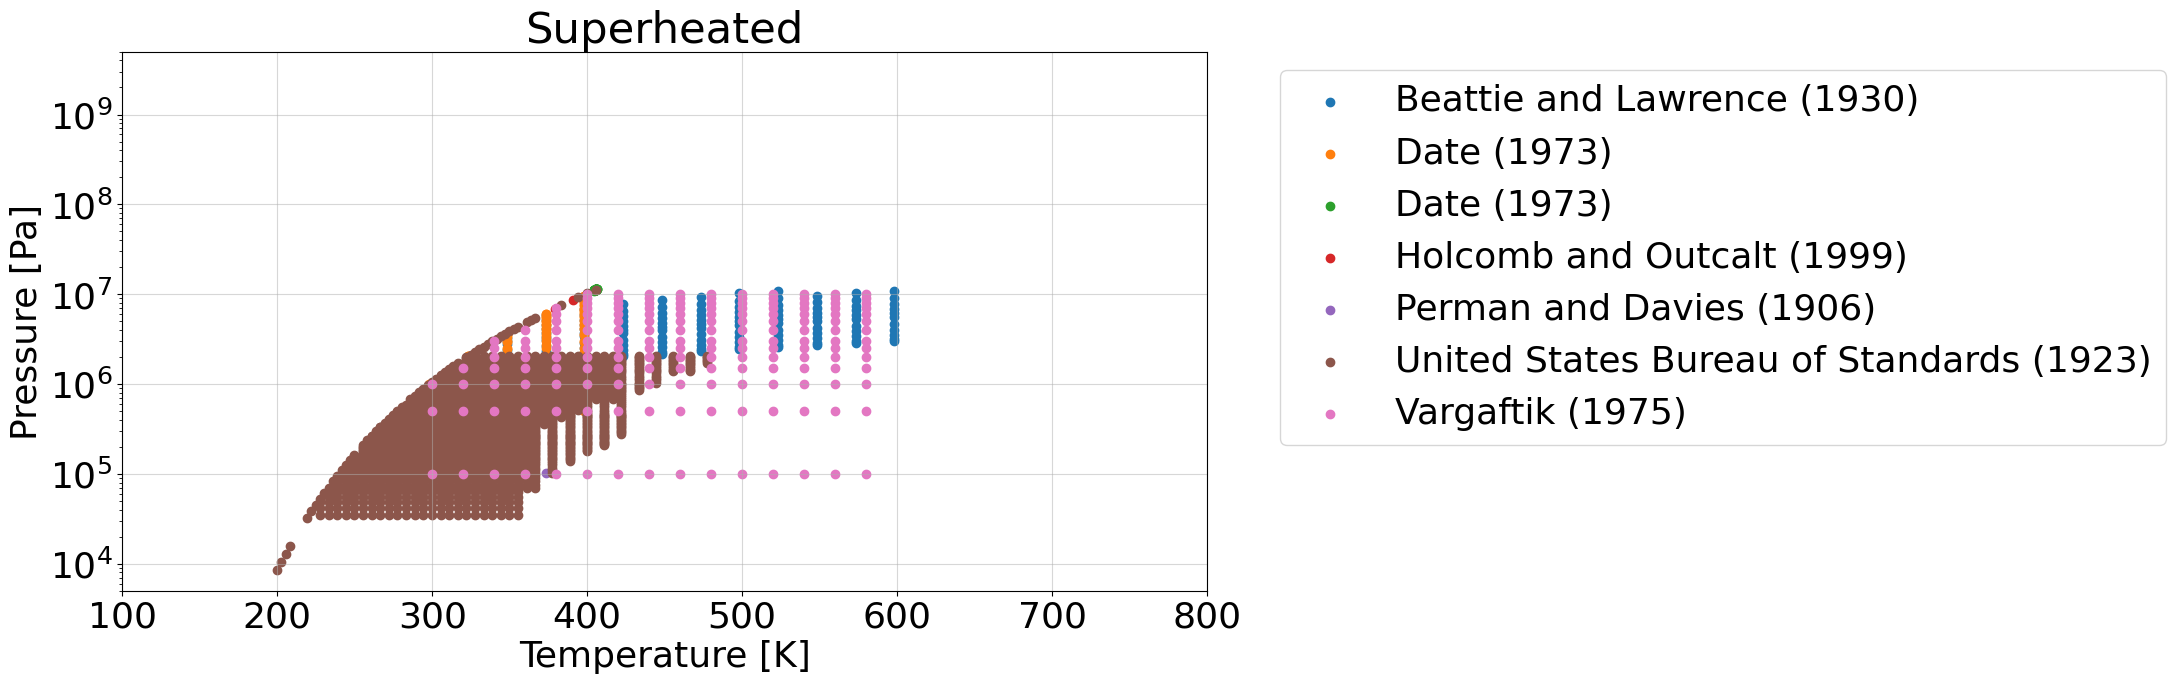

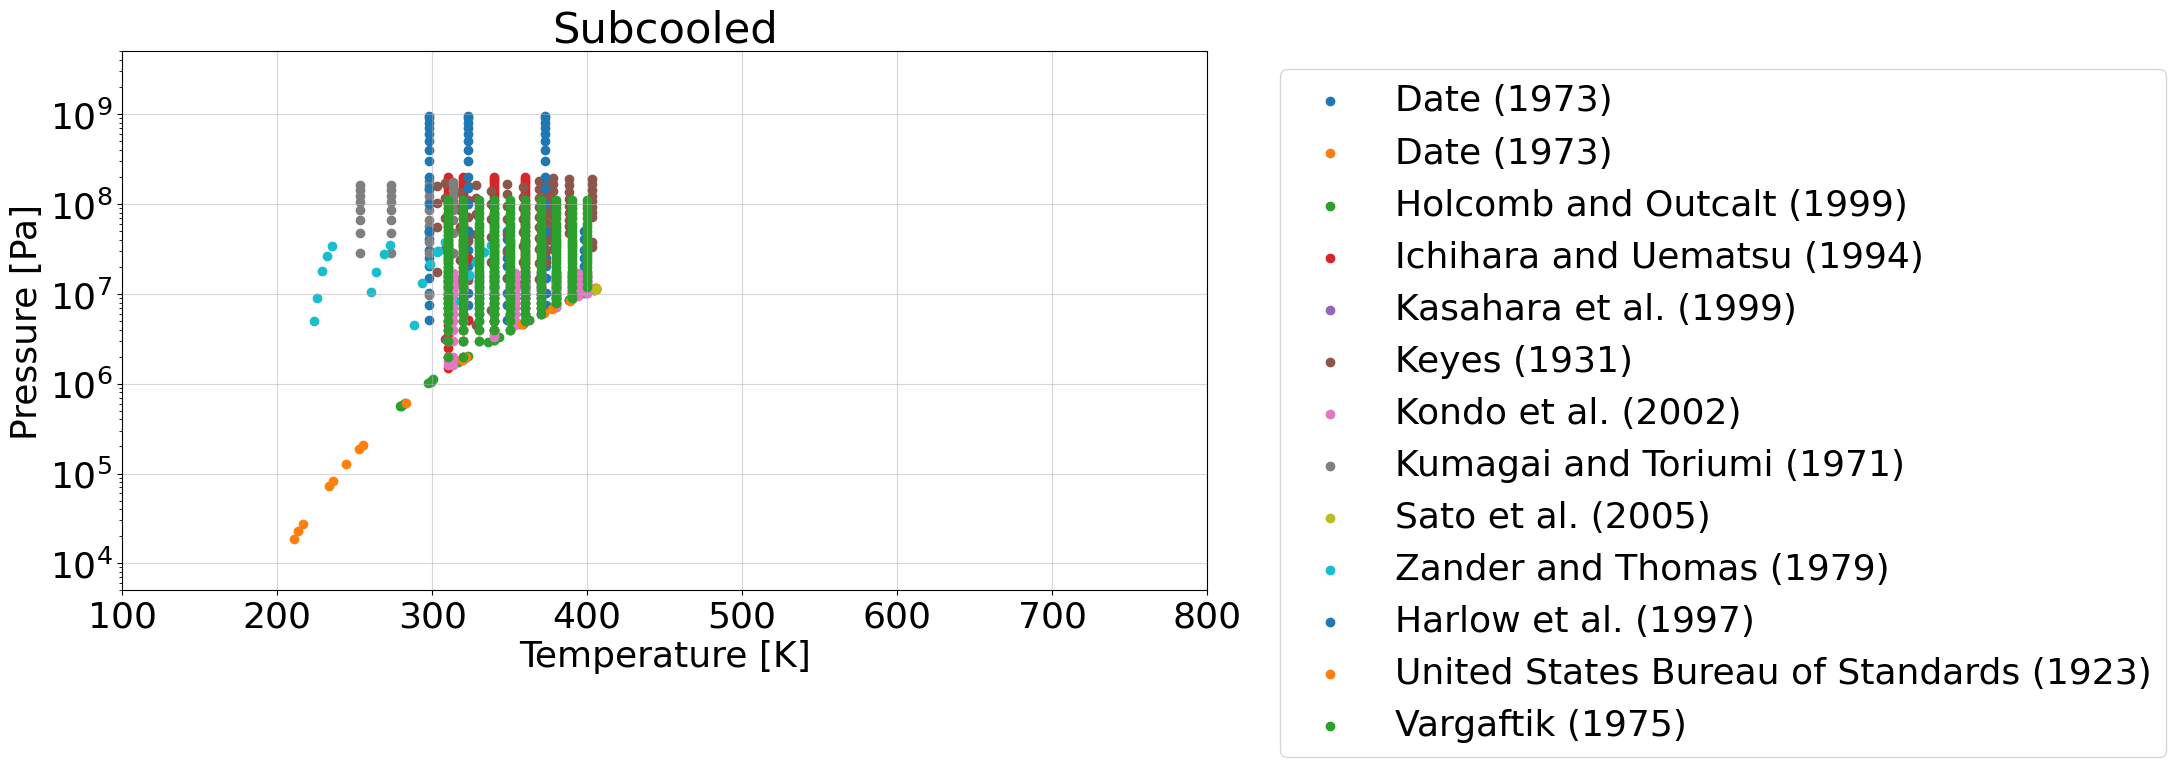

In [14]:
# 05/11/2025
import pandas as pd
from purefluid import NH3
import numpy as np
import matplotlib.pyplot as plt

# ================================================ papers
def paper_path(paper_number):
    return f"dataframes/experimental_data_density/0{str(paper_number)}.xlsx"

#data: paper_number: [authors, year, path]
all_papers = {
    357: ["Beattie and Lawrence", 1930, paper_path(357)],
    358: ["Date", 1973, paper_path(358)],
    359: ["Date", 1973, paper_path(359)],
    360: ["Holcomb and Outcalt", 1999, paper_path(360)],
    361: ["Ichihara and Uematsu", 1994, paper_path(361)],
    362: ["Kasahara et al.", 1999, paper_path(362)],
    363: ["Keyes", 1931, paper_path(363)],
    364: ["Kondo et al.", 2002, paper_path(364)],
    365: ["Kumagai and Toriumi", 1971, paper_path(365)],
    367: ["Lichtblau et al.", 1964, paper_path(367)],
    368: ["Muromachi et al.", 2008, paper_path(368)],
    369: ["Perman and Davies", 1906, paper_path(369)],
    370: ["Sato et al.", 2005, paper_path(370)],
    372: ["Zander and Thomas", 1979, paper_path(372)],
    373: ["Harlow et al.", 1997, paper_path(373)],
    374: ["United States Bureau of Standards", 1923, paper_path(374)],
    376: ["Vargaftik", 1975, paper_path(376)],
}
# ================================================ data
# density data
df = pd.read_csv("dataframes/experimental_data_ammonia_density/ammonia_density.csv")

# saturation data
df_saturation = pd.read_csv("dataframes/experimental_data_ammonia_saturation/ammonia_saturation.csv")

# ================================================ supercritical
df_supercritical = df[df["T"]>NH3.T_c][df["P"]>NH3.P_c]

fig, ax = plt.subplots()

for paper in df_supercritical["paper"].unique():
    data = df_supercritical[df_supercritical["paper"]==paper]
    ax.scatter(data["T"], data["P"], label = all_papers[paper][0] + " " + f"({all_papers[paper][1]})")

ax.set(yscale="log", 
       ylabel="Pressure [Pa]", xlabel="Temperature [K]", title="Supercritical",
       xlim=(100, 800), ylim=(5e3, 5e9))
ax.grid(alpha=0.5)
ax.legend(loc="upper left", bbox_to_anchor=(1.05,1)) 


# ================================================ superheated
# order saturation data by T
df_saturation = df_saturation.sort_values(by="T")

# linearly interpolate saturation line for temperature at density pressure
T_interpolated = np.interp(df["P"], df_saturation["P"], df_saturation["T"])
print(T_interpolated)
df_superheated = df[df["P"]<NH3.P_c][df["T"]>T_interpolated]


fig, ax = plt.subplots()

for paper in df_superheated["paper"].unique():
    data = df_superheated[df_superheated["paper"]==paper]
    ax.scatter(data["T"], data["P"], label = all_papers[paper][0] + " " + f"({all_papers[paper][1]})")

ax.set(yscale="log", 
       ylabel="Pressure [Pa]", xlabel="Temperature [K]", title="Superheated",
       xlim=(100, 800), ylim=(5e3, 5e9))
ax.grid(alpha=0.5)
ax.legend(loc="upper left", bbox_to_anchor=(1.05,1)) 


# ================================================ subcooled
# order saturation data by P
df_saturation = df_saturation.sort_values(by="P")

# lineally interpolate saturation line for pressure at density temperature
P_interpolated = np.interp(df["T"], df_saturation["T"], df_saturation["P"])
df_subcooled = df[df["T"]<NH3.T_c][df["P"]>P_interpolated]

# plotting
fig, ax = plt.subplots()

for paper in df_subcooled["paper"].unique():
    data = df_subcooled[df_subcooled["paper"]==paper]
    ax.scatter(data["T"], data["P"], label = all_papers[paper][0] + " " + f"({all_papers[paper][1]})")

ax.set(yscale="log", 
       ylabel="Pressure [Pa]", xlabel="Temperature [K]", title="Subcooled",
       xlim=(100, 800), ylim=(5e3, 5e9))
ax.grid(alpha=0.5)
ax.legend(loc="upper left", bbox_to_anchor=(1.05,1))

# Saturation: experimental data

## Create mega dataframe of saturation data

In [ ]:
#05/11/2025
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../")

#plotting parameters
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams.update({'font.size': 20*1.3})
plt.rcParams['figure.facecolor'] = "white"

def paper_path(paper_number):
    return f"dataframes/experimental_data_saturation/0{str(paper_number)}.xlsx"

#data: paper_number: [authors, year, path]
#data: paper_number: [authors, year, path]
all_papers = {
    357: ["Beattie and Lawrence", 1930, paper_path(357)],
    358: ["Date", 1973, paper_path(358)],
    359: ["Date", 1973, paper_path(359)],
    376: ["Vargaftik", 1975, paper_path(376)],
    385: ["Baehre et al.", 1976, paper_path(385)],
    386: ["Burrell and Robertson", 1915, paper_path(386)],
    388: ["Calado et al.", 1992, paper_path(388)],
    389: ["Cragoe et al.", 1919, paper_path(389)]
}

# mega_df
pressure =[]
temperature = []
density_v =[]
density_l = []

pressure_error =[]
temperature_error = []
density_error = []

paper =[]

#create mega dataframe
for key in all_papers.keys():
    print(key)
    path = all_papers[key][2]
    data = pd.read_excel(path)

    pressure += list(data["P_SI"])
    temperature += list(data["T_SI"])
    density_v += list(data["rho_v_SI"])
    density_l += list(data["rho_l_SI"])

    pressure_error += list(data["delta_P"])
    temperature_error += list(data["delta_T"])
    density_error += list(data["delta_rho"])

    paper += [key]*(data.index[-1]+1)

df = pd.DataFrame(data = {"paper": paper,
                          "P": pressure,
                          "T": temperature,
                          "rho_v": density_v,
                          "rho_l": density_l,
                          "delta_P": pressure_error,
                          "delta_T": temperature_error,
                          "delta_rho": density_error}
)


# save dataframe
# df.to_csv("dataframes/experimental_data_saturation/ammonia_saturation.csv")



357
358
359
376
385
386
388
389


## Visualising experimental data from specific papers

points = 150
pressure range = [0.06, 33.12] bar
temperature range = [194.70, 343.16] K


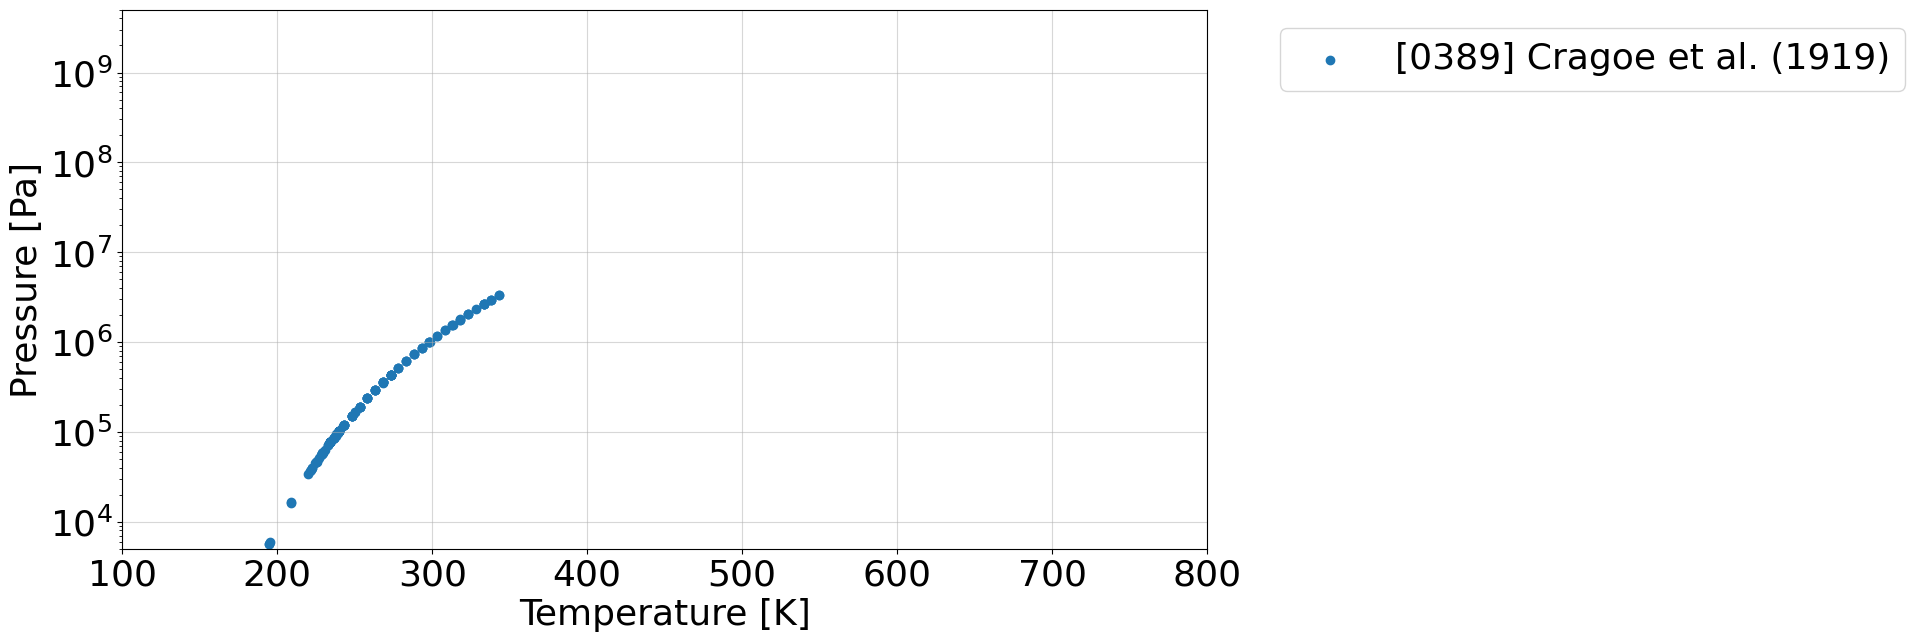

In [16]:
#05/11/2025
import pandas as pd
import matplotlib.pyplot as plt

def paper_path(paper_number):
    return f"dataframes/experimental_data_saturation/0{str(paper_number)}.xlsx"


#data: paper_number: [authors, year, path]
all_papers = {
    357: ["Beattie and Lawrence", 1930, paper_path(357)],
    358: ["Date", 1973, paper_path(358)],
    359: ["Date", 1973, paper_path(359)],
    376: ["Vargaftik", 1975, paper_path(376)],
    385: ["Baehre et al.", 1976, paper_path(385)],
    386: ["Burrell and Robertson", 1915, paper_path(386)],
    388: ["Calado et al.", 1992, paper_path(388)],
    389: ["Cragoe et al.", 1919, paper_path(389)]
}

# choose the paper
paper = 389

# the data
data = pd.read_excel(f"dataframes/experimental_data_saturation/0{str(paper)}.xlsx")

# data ranges
print(f"points = {data.index[-1]+1}")
print(f"pressure range = [{min(data['P_SI']/1e5):.2f}, {max(data['P_SI']/1e5):.2f}] bar")
print(f"temperature range = [{min(data['T_SI']):.2f}, {max(data['T_SI']):.2f}] K")


fig, ax = plt.subplots()


ax.scatter(data["T_SI"], data["P_SI"], label =  f"[0{paper}] " + all_papers[paper][0] + " " + f"({all_papers[paper][1]})")

ax.set(yscale="log", ylabel="Pressure [Pa]", xlabel="Temperature [K]", xlim=(100, 800), ylim=(5e3, 5e9))
ax.grid(alpha=0.5)
ax.legend(loc="upper left", bbox_to_anchor=(1.05,1))    


## All saturation data coloured by paper

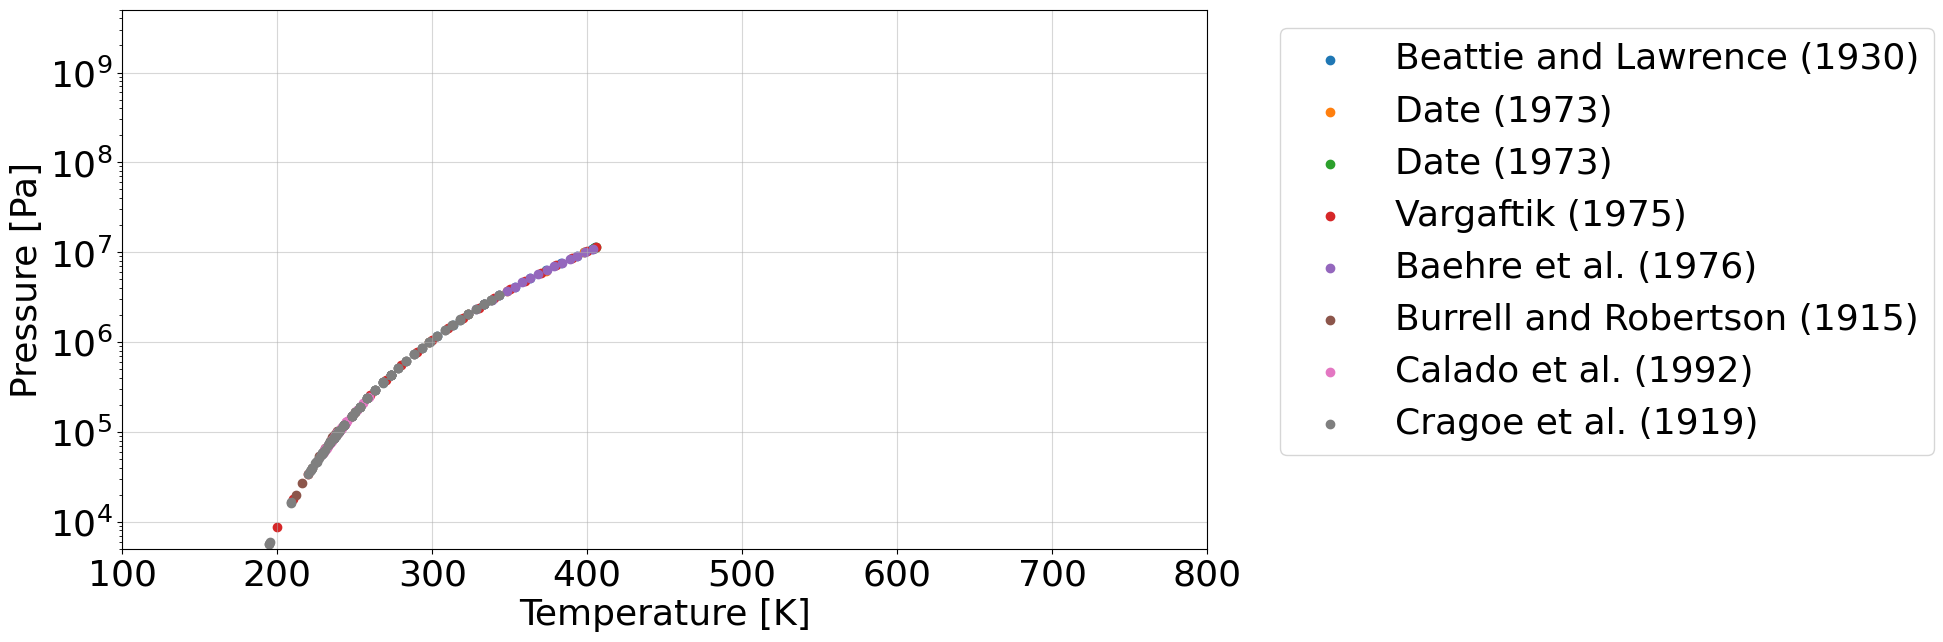

In [21]:
#05/11/2025
import pandas as pd
import matplotlib.pyplot as plt

def paper_path(paper_number):
    return f"dataframes/experimental_data_density/0{str(paper_number)}.xlsx"

#data: paper_number: [authors, year, path]
all_papers = {
    357: ["Beattie and Lawrence", 1930, paper_path(357)],
    358: ["Date", 1973, paper_path(358)],
    359: ["Date", 1973, paper_path(359)],
    376: ["Vargaftik", 1975, paper_path(376)],
    385: ["Baehre et al.", 1976, paper_path(385)],
    386: ["Burrell and Robertson", 1915, paper_path(386)],
    388: ["Calado et al.", 1992, paper_path(388)],
    389: ["Cragoe et al.", 1919, paper_path(389)]
}

df = pd.read_csv("dataframes/experimental_data_saturation/ammonia_saturation.csv")

fig, ax = plt.subplots()

for paper in df["paper"].unique():
    data = df[df["paper"]==paper]
    ax.scatter(data["T"], data["P"], label = all_papers[paper][0] + " " + f"({all_papers[paper][1]})")

ax.set(yscale="log", ylabel="Pressure [Pa]", xlabel="Temperature [K]", xlim=(100, 800), ylim=(5e3, 5e9))
ax.grid(alpha=0.5)
ax.legend(loc="upper left", bbox_to_anchor=(1.05,1))    


# Density: calculations from EOS

## Calculating density from each EOS

In [3]:
# 07/11/2025
import pandas as pd
from purefluid import NH3
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

# import the multi_root function
from other_functions import multi_root, choose_root

# import the presets
from presets_EOS_purefluid import \
    NH3_ideal, NH3_vdW, NH3_PR, NH3_RK, NH3_MSRK, \
    NH3_0290, NH3_0298, NH3_0300,\
    NH3_0323, NH3_0324, NH3_0328, NH3_0330 

# ================================================ helpful functions
# identify phase and choose root accordingly
def identify_phase(pressure, temperature, fluid, df_saturation):
    # order saturation data by temperature
    df_saturation = df_saturation.sort_values(by="T")

    # linearly interpolate saturation line for temperature at density pressure
    # T_saturation = np.interp(pressure, df_saturation["P"], df_saturation["T"])

    # linearly interpolate saturation line for pressure at density temperature
    P_saturation = np.interp(temperature, df_saturation["T"], df_saturation["P"])

    # if temperature > T_saturation and pressure < fluid.P_c:
    #     phase = "superheated"

    if pressure>P_saturation and temperature < fluid.T_c:
        phase = "subcooled"
    
    elif temperature > fluid.T_c and pressure > fluid.P_c:
        phase = "supercritical"

    else:
        phase = "superheated"

    return phase

def choose_root(roots, phase):
    if len(roots) == 0:
        return None
    if phase == "superheated" :
        # choose the lowest root
        return roots[0]
    
    elif phase == "supercritical":
        # choose the lowest root
        return roots[0]
    elif phase == "subcooled":
        # choose the highest root
        return roots[-1]
    else:
        raise ValueError("Phase not recognized")

# ================================= data and EOS
df = pd.read_csv("dataframes/experimental_data_ammonia_density/ammonia_density.csv")

df_saturation = pd.read_csv("dataframes/experimental_data_ammonia_saturation/ammonia_saturation.csv")

eos_list = [NH3_ideal, NH3_vdW, NH3_PR, NH3_RK, NH3_MSRK,
            NH3_0290, NH3_0298, NH3_0300,
            NH3_0323, NH3_0324, NH3_0328, NH3_0330]

# ================================= update specific EOS
# df = pd.read_csv("dataframes/ammonia_density_EOS.csv")

# eos_list = [NH3_0298]

# ================================= calculate densities using each EOS

# phases loop
phases =[]
for index, row in tqdm(df.iterrows()):
    rho_calculated = []
    P = row["P"]
    T = row["T"]

    phase = identify_phase(P, T, NH3, df_saturation)
    phases += [phase]

# add phases to dataframe
df["phase"] = phases

pressures = np.array(df["P"])
temperatures = np.array(df["T"])
densities = np.array(df["rho"])

for eos in eos_list:
    print(eos.name)
    rho_calculated = []
    for i in tqdm(df.index):
        pressure = pressures[i]
        temperature = temperatures[i]
        density = densities[i]

        n_points = 1e3

        density_roots = multi_root(eos.pressure_equation, [0,5], args=(pressure, temperature), n=n_points)
        density = choose_root(density_roots,phases[i])

        while density == None and n_points<5e5:
            n_points = n_points*5
            # print(f"root no t found, increasing number of points to:   {n_points}")

            density_roots = multi_root(eos.pressure_equation, [0,5], args=(pressure, temperature), n=n_points)
            density = choose_root(density_roots, phases[i])

        if density == None:
            density = np.nan
        rho_calculated.append(density*NH3.M)    # convert from molar density to mass density


        # add calculated densities to dataframe
    df[f"{eos.name}"] = rho_calculated

    # save dataframe
    df.to_csv("dataframes/ammonia_density_EOS.csv", index=False)

3952it [00:06, 625.88it/s] 


ideal


 30%|██▉       | 1173/3952 [00:01<00:02, 967.57it/s] 

root not found, increasing number of points to:   5000.0
root not found, increasing number of points to:   25000.0
root not found, increasing number of points to:   125000.0
root not found, increasing number of points to:   625000.0
root not found, increasing number of points to:   5000.0
root not found, increasing number of points to:   25000.0
root not found, increasing number of points to:   125000.0
root not found, increasing number of points to:   625000.0
root not found, increasing number of points to:   5000.0
root not found, increasing number of points to:   25000.0
root not found, increasing number of points to:   125000.0
root not found, increasing number of points to:   625000.0
root not found, increasing number of points to:   5000.0
root not found, increasing number of points to:   25000.0
root not found, increasing number of points to:   125000.0
root not found, increasing number of points to:   625000.0
root not found, increasing number of points to:   5000.0
root not fo

 32%|███▏      | 1273/3952 [00:05<00:37, 71.93it/s] 

root not found, increasing number of points to:   5000.0
root not found, increasing number of points to:   25000.0
root not found, increasing number of points to:   125000.0
root not found, increasing number of points to:   625000.0
root not found, increasing number of points to:   5000.0
root not found, increasing number of points to:   25000.0
root not found, increasing number of points to:   125000.0
root not found, increasing number of points to:   625000.0
root not found, increasing number of points to:   5000.0
root not found, increasing number of points to:   25000.0
root not found, increasing number of points to:   125000.0
root not found, increasing number of points to:   625000.0
root not found, increasing number of points to:   5000.0
root not found, increasing number of points to:   25000.0
root not found, increasing number of points to:   125000.0
root not found, increasing number of points to:   625000.0
root not found, increasing number of points to:   5000.0
root not fo

100%|██████████| 3952/3952 [00:10<00:00, 366.82it/s]


vdW


100%|██████████| 3952/3952 [00:14<00:00, 273.35it/s]


PR


100%|██████████| 3952/3952 [00:20<00:00, 192.09it/s]


RK


100%|██████████| 3952/3952 [00:12<00:00, 322.08it/s]


MSRK


100%|██████████| 3952/3952 [00:18<00:00, 209.21it/s]


0290


100%|██████████| 3952/3952 [01:23<00:00, 47.60it/s] 


0298


100%|██████████| 3952/3952 [01:33<00:00, 42.44it/s]


0300


100%|██████████| 3952/3952 [01:34<00:00, 41.89it/s] 


0323


100%|██████████| 3952/3952 [06:34<00:00, 10.02it/s]


0324


  0%|          | 0/3952 [00:00<?, ?it/s]<lambdifygenerated-32>:2: RuntimeWarning: invalid value encountered in log
  return P - 8.31446261815324*T*rho*(rho*(-5.9222248359399*T**(-2.0)*rho*(2.76827064590464e-15*rho**2 - 2.68227756762784e-10*rho - 7.40101708100397e-6)/((1 - 1.07108141061738e-5*rho)**2*(0.00574781212822397*T**(-1.0)*rho*(1 - 1.07108141061738e-5*rho)**2*(-4.87831386636589e-11*rho**2 + 1.27601062321411e-5*rho + 1)/((8.39372944290903e-11*rho**2 - 1.20805545808671e-5*rho + 1)*(9.22756881968214e-16*rho**3 - 1.34113878381392e-10*rho**2 - 7.40101708100397e-6*rho + 1)) + 1)) - 5.9222248359399*T**(-2.0)*rho*(9.22756881968214e-16*rho**3 - 1.34113878381392e-10*rho**2 - 7.40101708100397e-6*rho + 1)*(-0.00574781212822397*T**(-1.0)*rho*(1.20805545808671e-5 - 1.67874588858181e-10*rho)*(1 - 1.07108141061738e-5*rho)**2*(-4.87831386636589e-11*rho**2 + 1.27601062321411e-5*rho + 1)/((8.39372944290903e-11*rho**2 - 1.20805545808671e-5*rho + 1)**2*(9.22756881968214e-16*rho**3 - 1.34113878381392

0328


  0%|          | 0/3952 [00:00<?, ?it/s]<lambdifygenerated-33>:2: RuntimeWarning: invalid value encountered in sqrt
  return P - 8.31446261815324*T*rho*(rho*(5.9100251170005e-6*rho*(exp(893.1/T) - 1)*(1.12301880574675e-13*rho**2*(3.3476 - 0.401712*exp(-849.54/T))**6/(-4.73923792554615e-7*rho*(3.3476 - 0.401712*exp(-849.54/T))**3 + 1)**3 + 4.73923792554615e-7*rho*(3.3476 - 0.401712*exp(-849.54/T))**2*(5.0214 - 0.602568*exp(-849.54/T))/(-4.73923792554615e-7*rho*(3.3476 - 0.401712*exp(-849.54/T))**3 + 1)**2 + (-4.73923792554615e-7*rho*(3.3476 - 0.401712*exp(-849.54/T))**3 + 1)**(-1.0))*(338408.037259756*(7.38753139625062e-7*rho*(exp(893.1/T) - 1)*(1.12301880574675e-13*rho**2*(3.3476 - 0.401712*exp(-849.54/T))**6/(-4.73923792554615e-7*rho*(3.3476 - 0.401712*exp(-849.54/T))**3 + 1)**3 + 4.73923792554615e-7*rho*(3.3476 - 0.401712*exp(-849.54/T))**2*(5.0214 - 0.602568*exp(-849.54/T))/(-4.73923792554615e-7*rho*(3.3476 - 0.401712*exp(-849.54/T))**3 + 1)**2 + (-4.73923792554615e-7*rho*(3.3476 - 

0330


100%|██████████| 3952/3952 [02:16<00:00, 28.99it/s]


## Calculating the percentage difference from the EOS

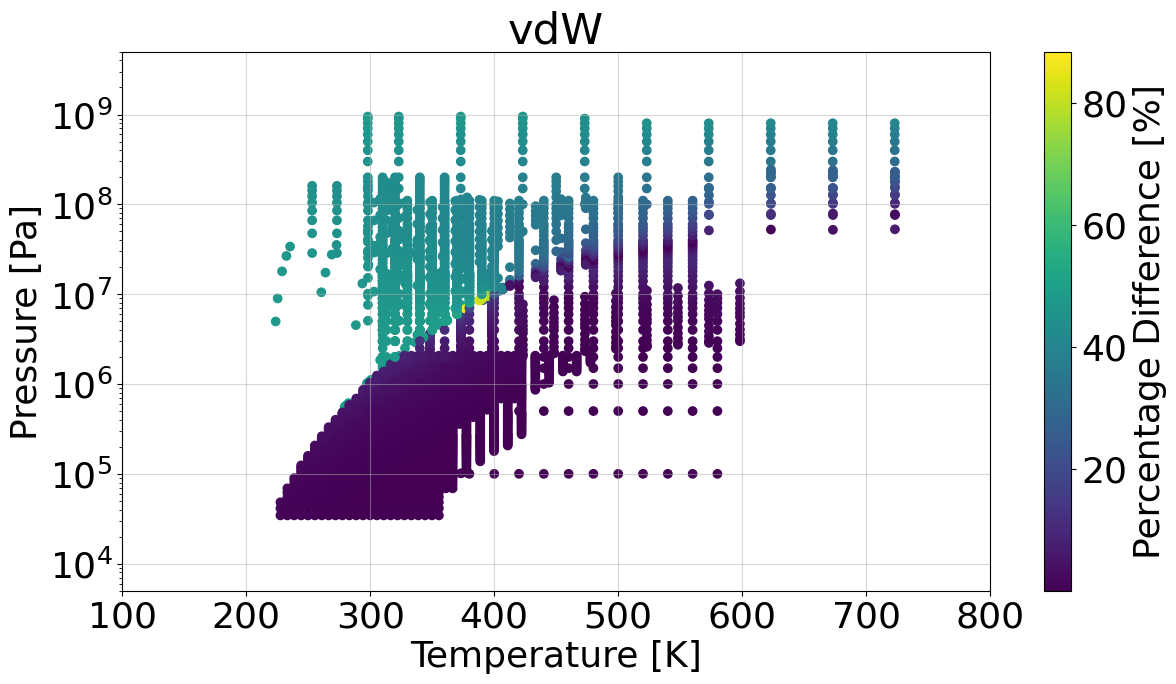

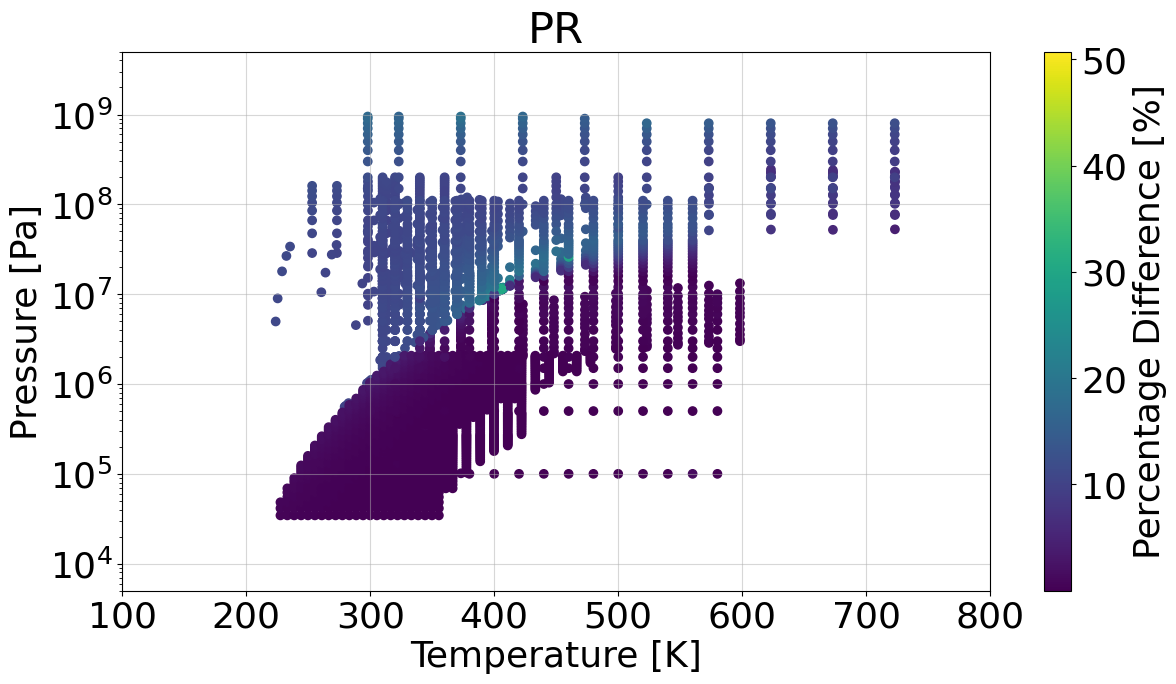

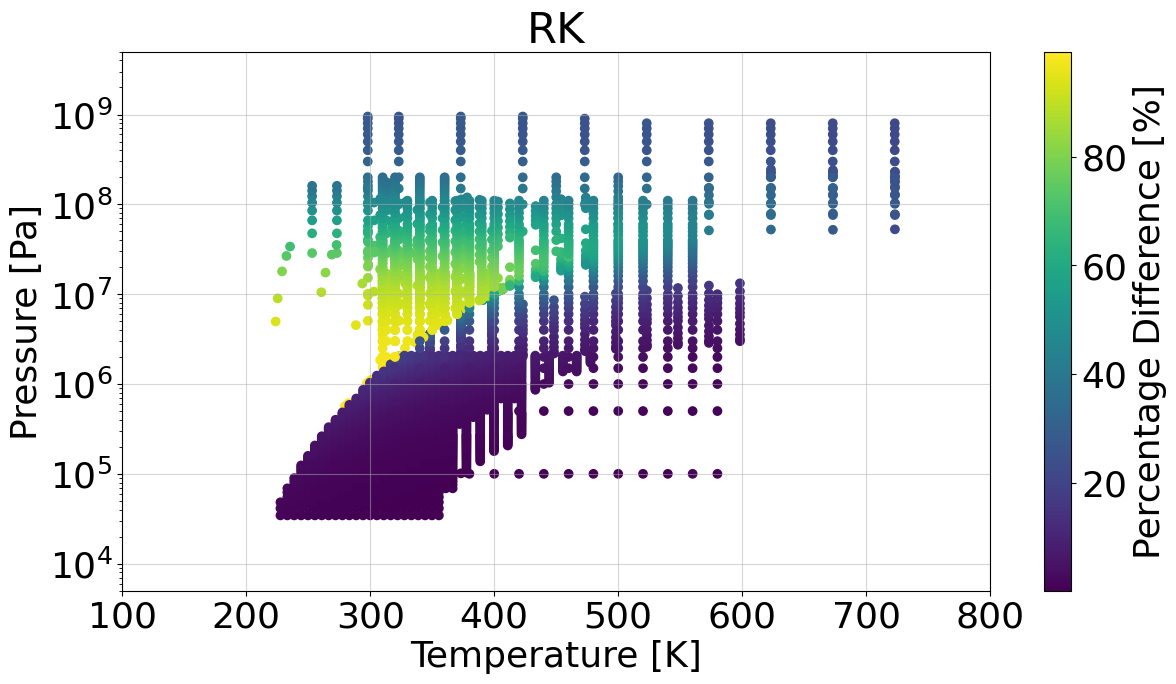

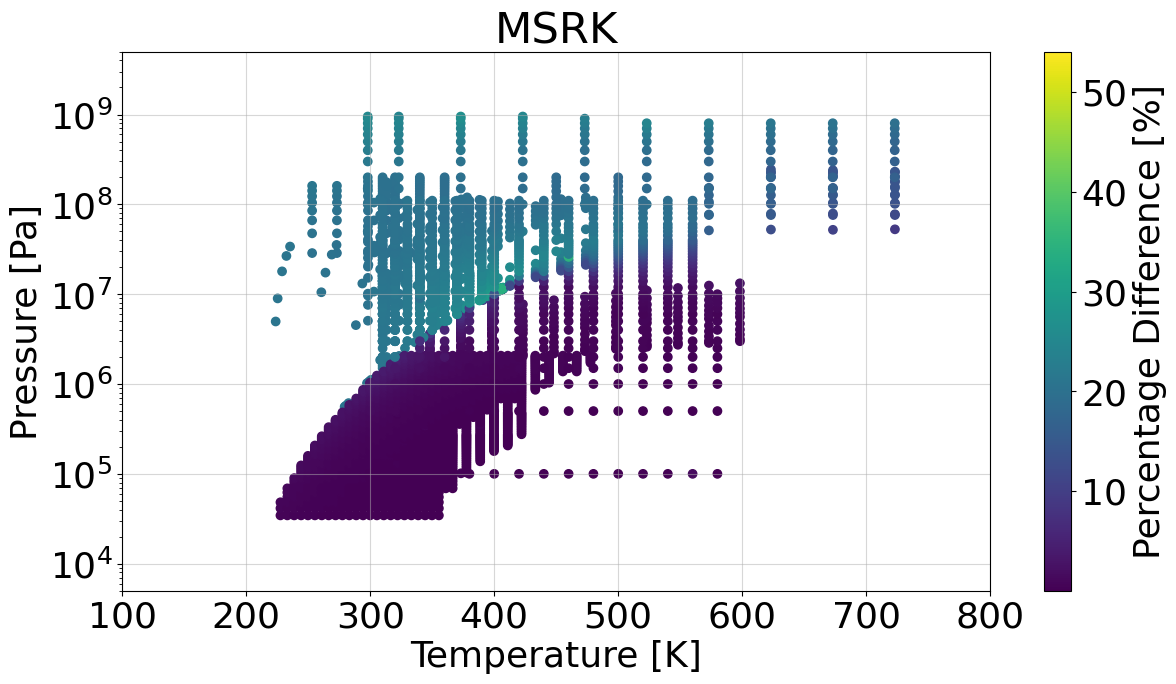

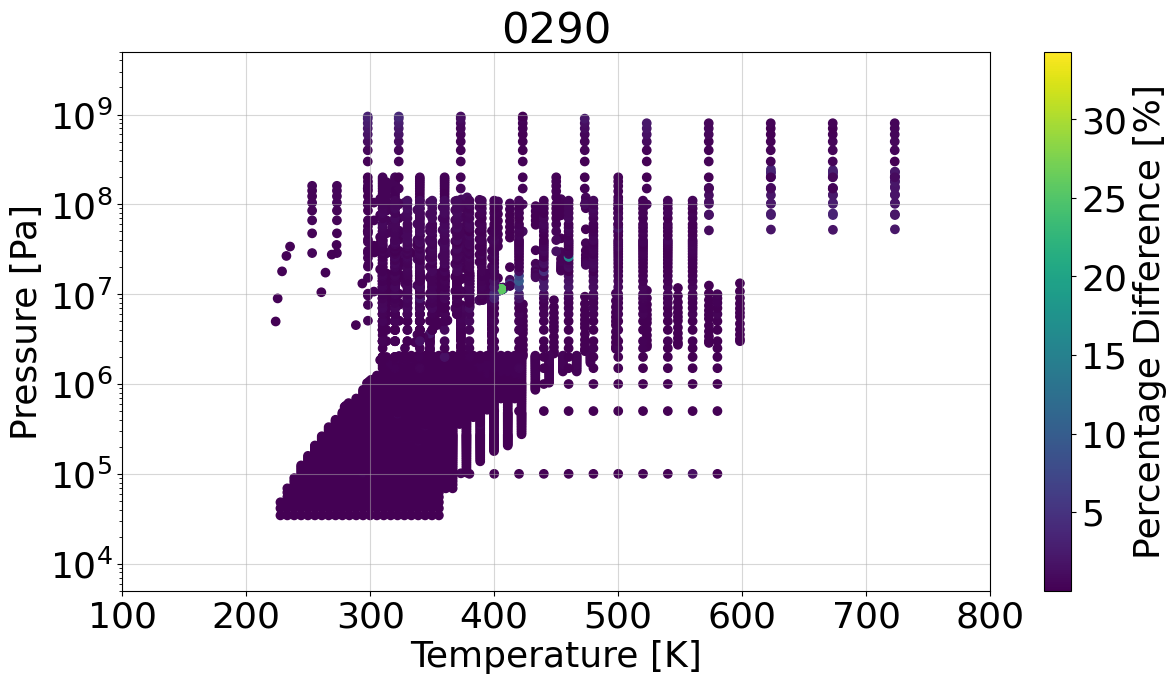

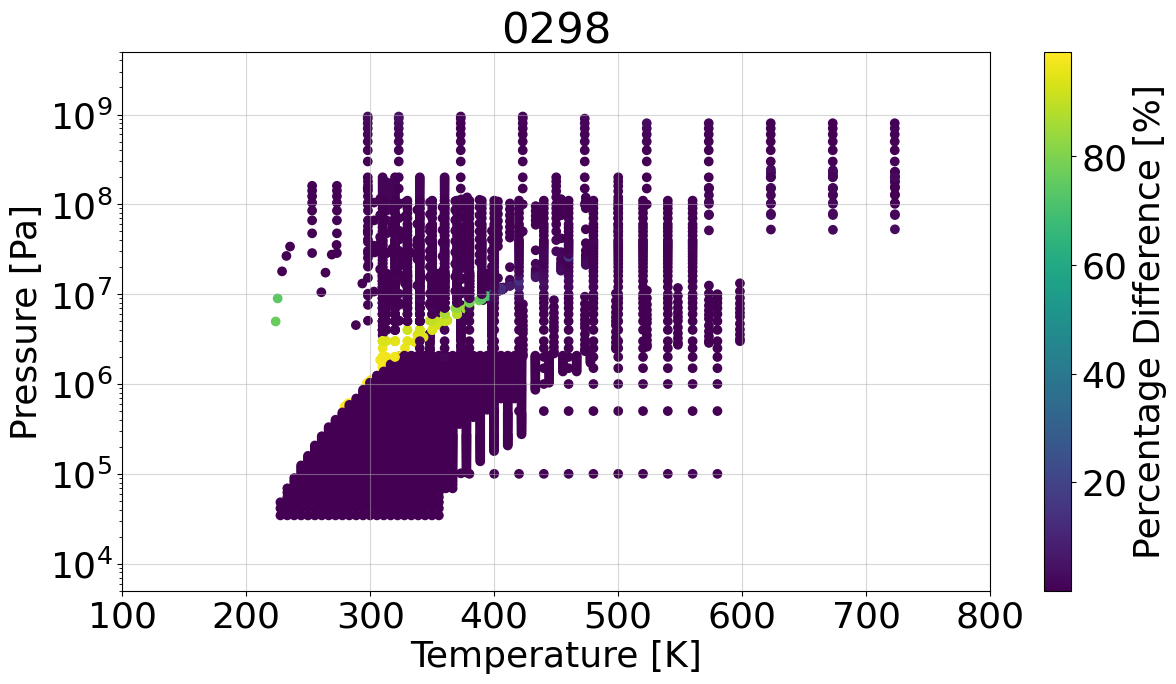

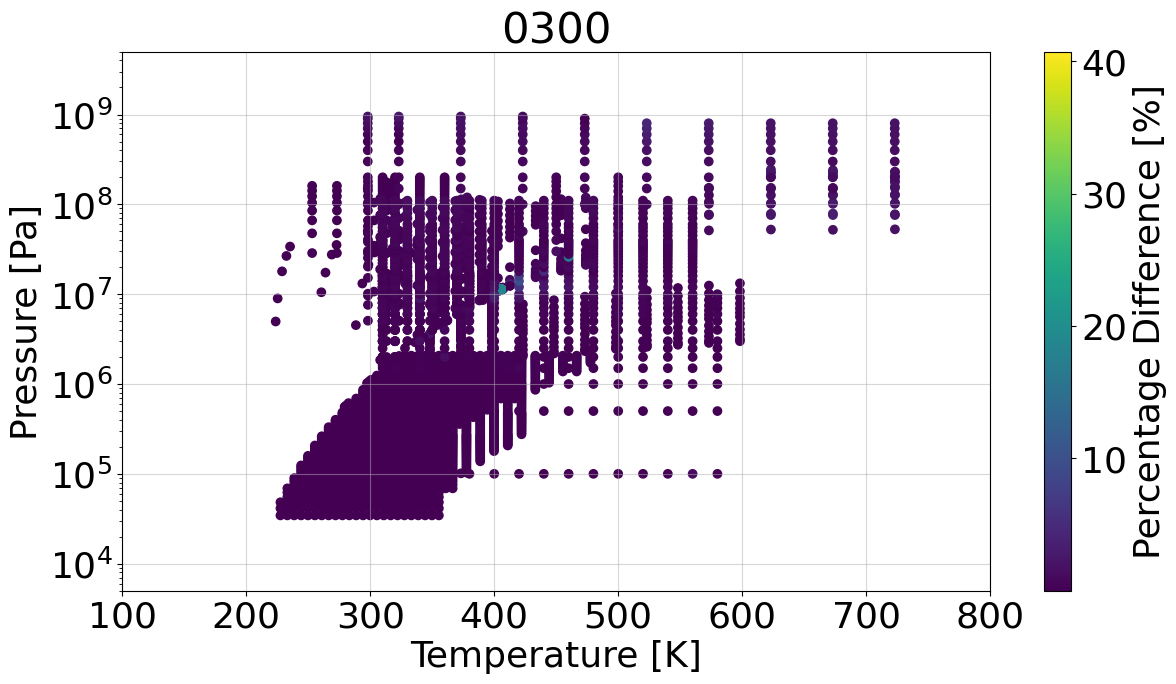

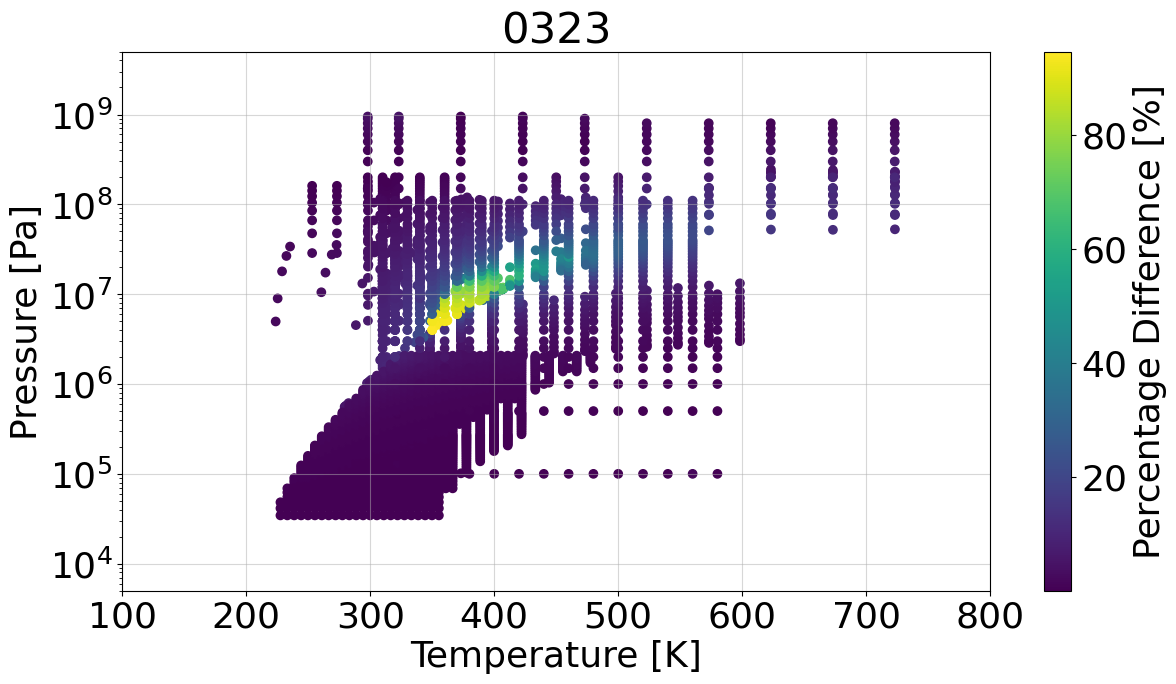

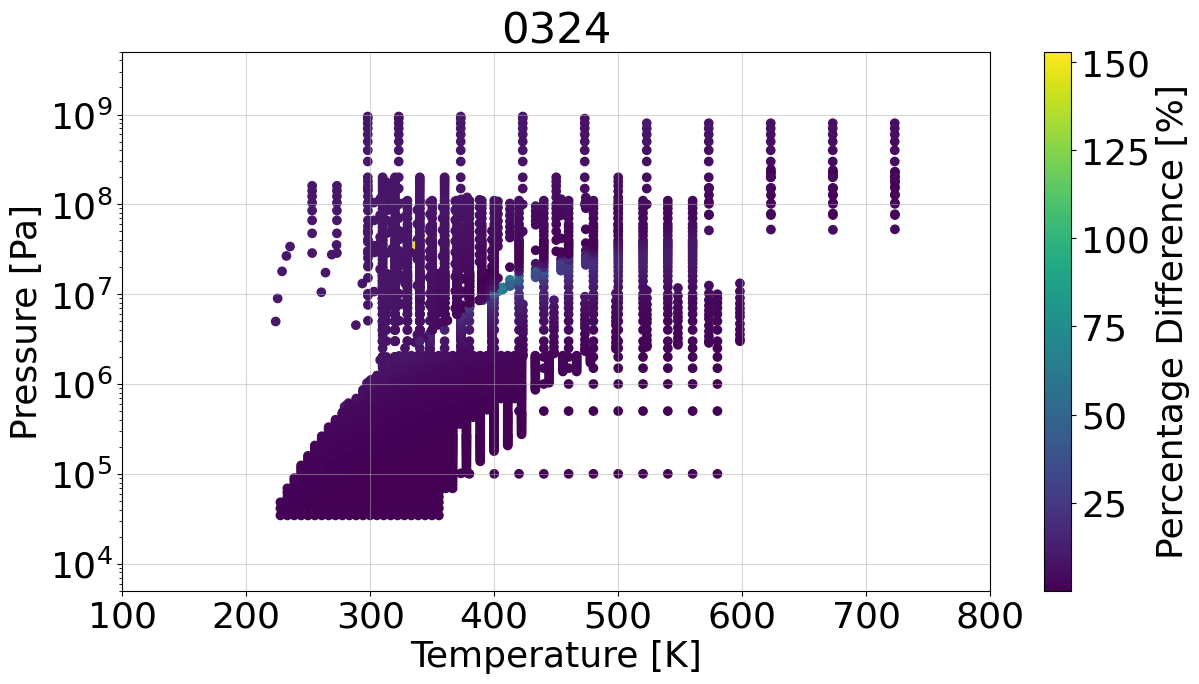

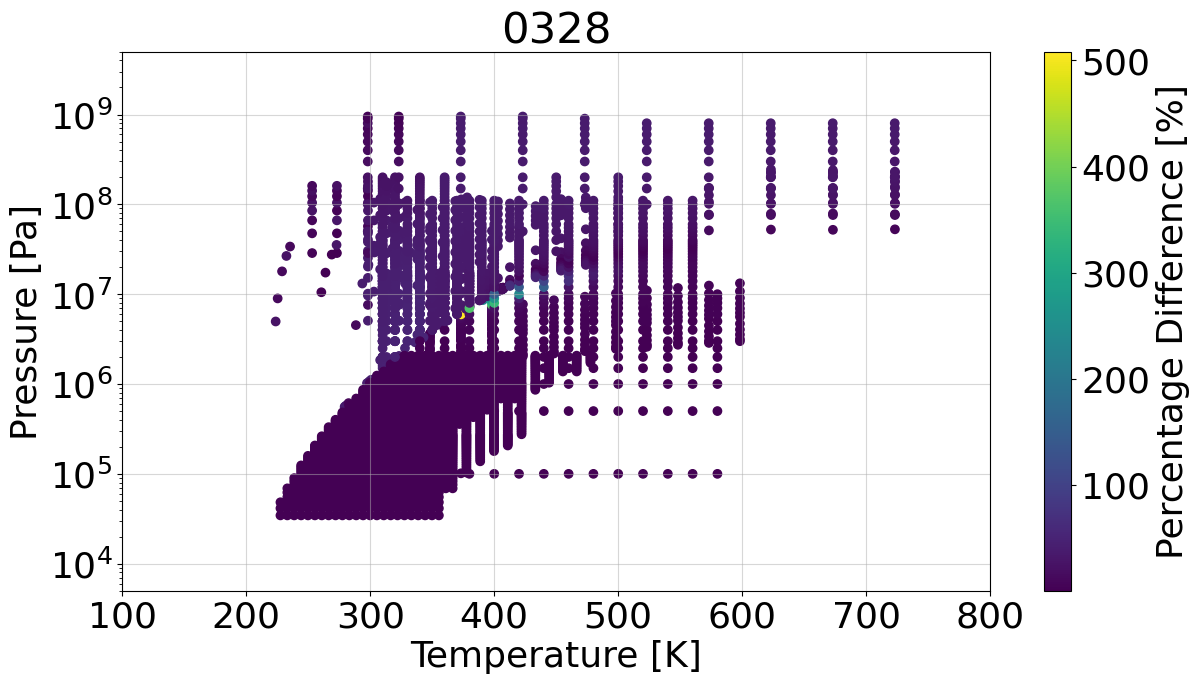

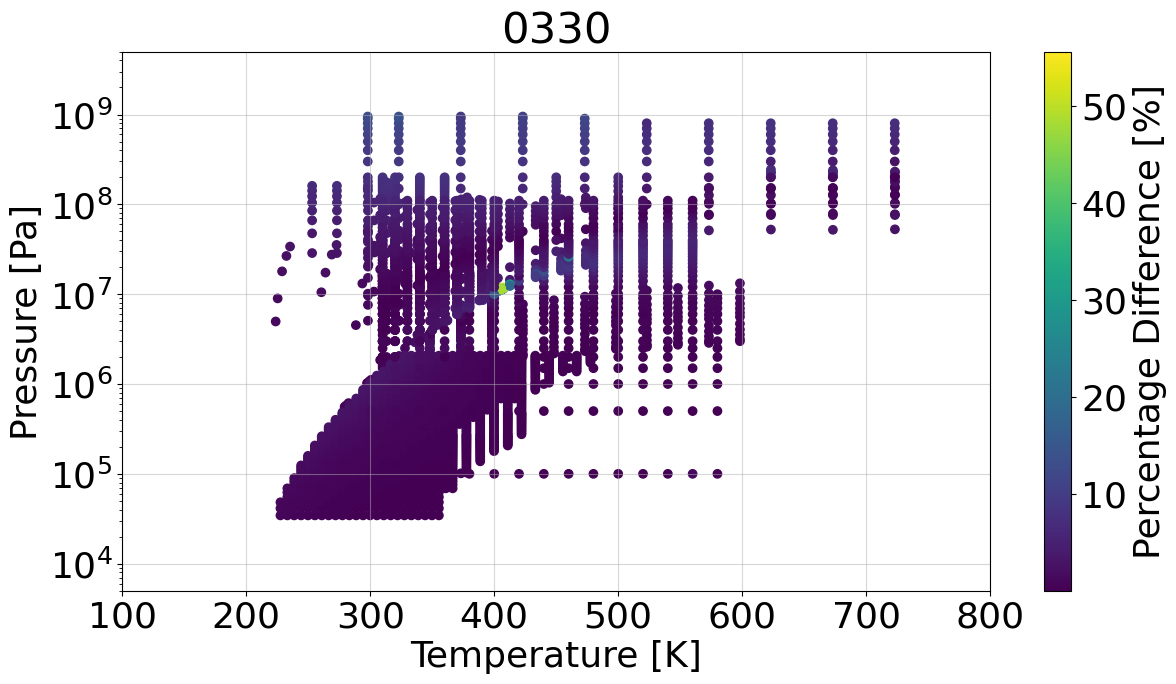

In [22]:
# 07/11/2025
import matplotlib.pyplot as plt
import pandas as pd

# plotting parameters
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams.update({'font.size': 20*1.3})
plt.rcParams['figure.facecolor'] = "white"

df = pd.read_csv("dataframes/ammonia_density_EOS.csv")

# calculate percentage difference from experimental data but don't add to dataframe
for eos in df.columns[8:]:
    percentage_difference = 100 * abs(df[eos] - df["rho"]) / df["rho"]
    df[f"{eos}_percentage_difference"] = percentage_difference

    # BEGIN: drop all values with percentage difference higher than 5%
    error_df = df[df[f"{eos}_percentage_difference"] <= 5]
    # END: drop all values with percentage difference higher than 5%

    
    fig, ax = plt.subplots()
    ax.scatter(error_df["T"], error_df["P"],c=error_df[f"{eos}_percentage_difference"], s=3)

    ax.set(yscale="log", ylabel="Pressure [Pa]", xlabel="Temperature [K]", title=f"{eos}",
        xlim=(100, 800), ylim=(5e3, 5e9))
    ax.grid(alpha=0.5)
    cbar = plt.colorbar(ax.scatter(df["T"], df["P"],c=percentage_difference), ax=ax)
    cbar.set_label('Percentage Difference [%]')



## Calculating statistics: overall

|      |   Average absolute deviation |   Bias |   Standard deviation |   Root mean squared error |
|:-----|-----------------------------:|-------:|---------------------:|--------------------------:|
| vdW  |                        16.37 | -16.08 |                20.18 |                     25.8  |
| PR   |                         5.34 |  -5.26 |                 6.81 |                      8.61 |
| RK   |                        29.92 | -29.92 |                33.72 |                     45.07 |
| MSRK |                         8.91 |  -8.9  |                10.53 |                     13.79 |
| 0290 |                         0.57 |  -0.28 |                 2.7  |                      2.72 |
| 0298 |                        17.79 |  17.53 |                41.94 |                     45.45 |
| 0300 |                         0.56 |  -0.35 |                 2.61 |                      2.64 |
| 0323 |                        10.61 | -10.58 |                19.65 |                     22.32 |


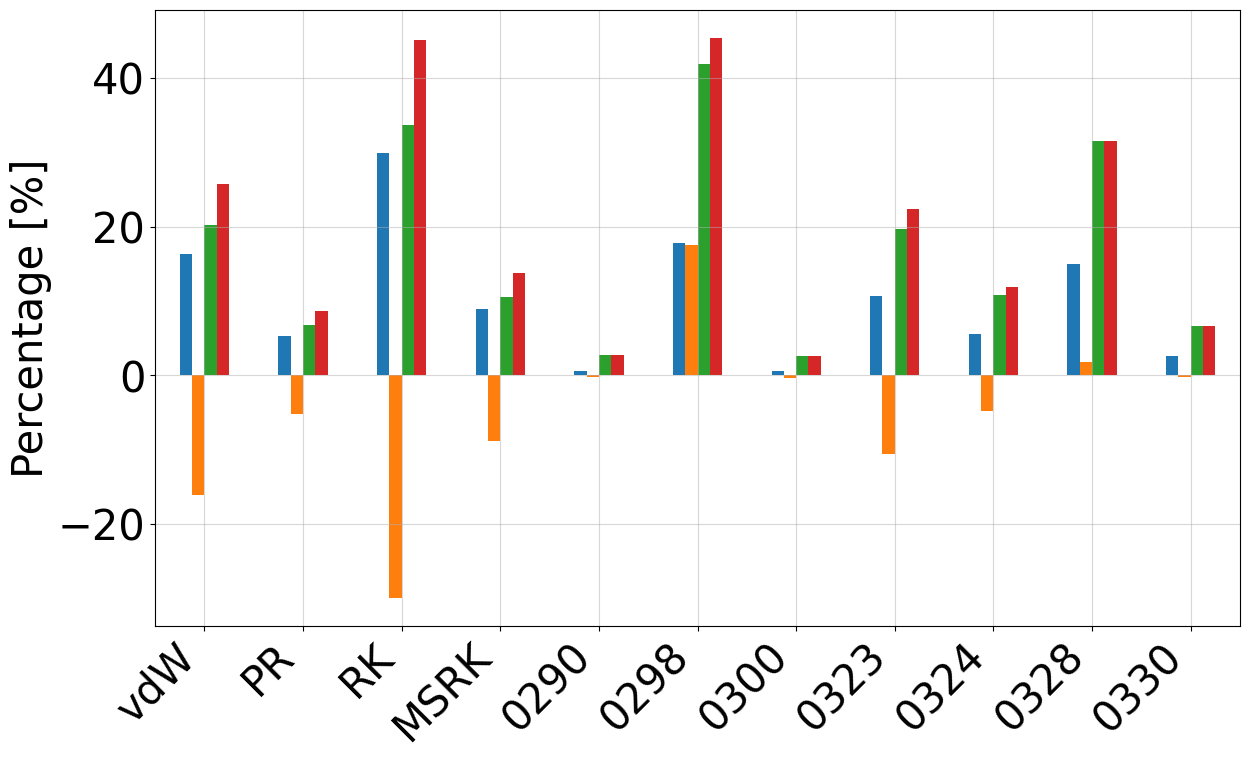

In [24]:
#import stuffs
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

#plotting parameters
plt.rcParams['figure.figsize'] = [14, 8]
plt.rcParams.update({'font.size': 20*1.5})
plt.rcParams['figure.facecolor'] = "white"

#orders and titles
order_ammonia = ["ideal", "vdW", "PR", "RK", "SRK", "MSRK", "290", "298", "300", "323", "324", "328", "330"]
titles_ammonia = ["Ideal gas law", "vdW", "PR", "RK", "SRK", "MSRK", 
            "Haar and Gallagher (1978)", "Haar and Gallagher (1975)", "Gao et. al.", "NguyenHuynh et. al.", "Grandjean et. al.", "Huang and Radosz", "Mejbri and Bellagi" ]

#ammonia
order = order_ammonia
titles = titles_ammonia
data_all = pd.read_csv("dataframes/ammonia_density_EOS.csv")
name = "group statistics ammonia"
# ylimits = (-30, 60)
yticks = [-30, -20, -10, 0, 10, 20, 30, 40, 50, 60]


#import density dataframes

#for stats formulas see "Equations of state for fluids and fluid mixtures, Part II" page 868 and 869
percent_deviation = (data_all.iloc[:, 8:].sub(data_all.loc[:, "rho"], axis="index")).div(data_all.loc[:, "rho"], axis="index")*100   #calculate error at each cell

#AAD (absolute average deviation) dataframe
AAD = percent_deviation.abs().mean(axis=0)

#BIAS (bias, aka average deviation of the dataset)
BIAS = percent_deviation.mean(axis=0)

#SDV (standard deviation)
SDV = ( ((percent_deviation-BIAS)**2).sum(axis=0) * 1/(len(percent_deviation.index)-1) )**0.5

#RMS (root mean squared)
RMS = ((percent_deviation**2).mean(axis=0))**0.5

#all stats
stats = pd.DataFrame({
    "Average absolute deviation" : AAD,
    "Bias": BIAS,
    "Standard deviation": SDV,
    "Root mean squared error": RMS
}).round(2)

#resort and then rename the rows
# stats = stats.reindex(order)    #reorder

#rename
# stats["titles"] = titles
# stats = stats.set_index("titles").rename_axis(None)

#drop the RSK row

#plot
ax = stats.plot.bar(legend=False)
ax.grid(alpha=0.5)
ax.set(ylabel="Percentage [%]")
plt.xticks(rotation=45, ha='right')



print(stats.to_markdown())

# plt.savefig(f"imgs/{name}.png",dpi=200, bbox_inches="tight")

# #for latex:
# print(stats.to_latex(float_format="%.2f"))

#note: CoolProp has a massive standard deviation due to its error when calculating near the phase transition region, i.e. it calculates the density thinking its liquid instead of gaseous so the
#percentage deivations is then massive, so even though CoolProp is very right many times out of the 4000 experimental values (which leads to a low AAD) it sometimes has a massive SDV due to this gap in phases


# Tables

## Table of experimental data range and uncertainty for ammonia

In [ ]:
import pandas as pd
#CHOOSE SATURATION OR P RHO T
#AMMONIA
data = pd.read_csv("dataframes/ammonia_density.xlsx")
# data = pd.read_excel("dataframes/ammonia_saturation.xlsx")



ranges = pd.DataFrame(index=data["Paper"].unique(), columns=["Pressure [bar]", "Temperature [K]", r"$\Delta$P"+" [%]", r"$\Delta$T"+" [%]", r"$\Delta \rho$"+" [%]"])
strings = []
for paper in ranges.index:
    paper_data = data.query(f"Paper=={paper}")
    Tmin, Tmax = min(paper_data["T"]), max(paper_data["T"])
    Pmin, Pmax = min(paper_data["P"]), max(paper_data["P"])

    delta_P = max(abs(paper_data["delta_P"]))
    delta_T = max(abs(paper_data["delta_T"]))
    delta_rho = max(abs(paper_data["delta_rho"]))

    ranges.loc[paper,:] = f"[{round(int(round(Pmin,0))/1e5,1)}, {round(int(round(Pmax,0))/1e5,1)}]", \
                          f"[{round(Tmin,1)}, {round(Tmax,1)}]", \
                          f"{delta_P}", \
                          f"{delta_T}", \
                          f"{delta_rho}"

    strings+= [f"\cite{{0{paper}}}"]

ranges.index = strings  #change the index so latex can read it

overall_P_range = (min(data["P"]), max(data["P"]))
overall_T_range = (min(data["T"]), max(data["T"]))

# print(f"overall pressure range = [{ round(overall_P_range[0]/1e5,2) }, { round(overall_P_range[1]/1e5,2) }]")
# print(f"overall temperature range = [{ overall_T_range[0] }, { overall_T_range[1] }]")

# print("total number of datapoints: ", data.index[-1])

print(ranges.to_markdown())

# print(ranges.to_latex())
